In [1]:
import numpy as np
import pandas as pd
import yahoo_fin as yf
from yahoo_fin.stock_info import get_data
from datetime import datetime

In [2]:
"""Returns the closing price of the input arrays on a daily frequency """


def stock_data(ticks):
    
    data = pd.DataFrame()
    names = list()
    for i in ticks:
        data=pd.concat([data,(get_data(ticker=i,start_date=start,end_date=end)['close'])],axis=1)
        
        names.append(i)
        
    data.columns = names
    
    return data

In [3]:
ticks = ['AAPL','MSFT','GOOGL','NVDA','META','ORCL','ADBE','AMD','SAP','QCOM','CSCO','TSLA','AMZN','COST']
start = '2020-07-13'
end = '2023-07-13'

In [4]:
data = stock_data(ticks)

In [5]:
corr = data.corr()        # check for correlated pairs

In [6]:
corr

,AAPL,MSFT,GOOGL,NVDA,META,ORCL,ADBE,AMD,SAP,QCOM,CSCO,TSLA,AMZN,COST
AAPL,1.000000,0.860816,0.667570,0.820320,-0.059960,0.756595,0.005251,0.619568,-0.265428,0.355174,0.507605,0.630574,-0.197703,0.870806
MSFT,0.860816,1.000000,0.879969,0.889648,0.318584,0.845922,0.398753,0.811463,0.058398,0.423078,0.745285,0.669955,0.106759,0.715214
GOOGL,0.667570,0.879969,1.000000,0.627484,0.455312,0.645211,0.571849,0.763748,0.043066,0.597132,0.839343,0.768517,0.354472,0.564040
NVDA,0.820320,0.889648,0.627484,1.000000,0.241594,0.874549,0.245641,0.739449,0.139646,0.236448,0.569724,0.438462,-0.048730,0.641011
META,-0.059960,0.318584,0.455312,0.241594,1.000000,0.192205,0.908888,0.523254,0.762117,0.385295,0.517329,0.220349,0.837267,-0.335462
ORCL,0.756595,0.845922,0.645211,0.874549,0.192205,1.000000,0.212045,0.534592,0.094057,0.088713,0.636911,0.343142,-0.161386,0.626606
ADBE,0.005251,0.398753,0.571849,0.245641,0.908888,0.212045,1.000000,0.630429,0.664586,0.526653,0.580005,0.376271,0.850243,-0.167726
AMD,0.619568,0.811463,0.763748,0.739449,0.523254,0.534592,0.630429,1.000000,0.266323,0.697161,0.670491,0.701681,0.423008,0.460014
SAP,-0.265428,0.058398,0.043066,0.139646,0.762117,0.094057,0.664586,0.266323,1.000000,-0.003254,0.302027,-0.212989,0.607855,-0.483663
QCOM,0.355174,0.423078,0.597132,0.236448,0.385295,0.088713,0.526653,0.697161,-0.003254,1.000000,0.525339,0.730991,0.495841,0.274436


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

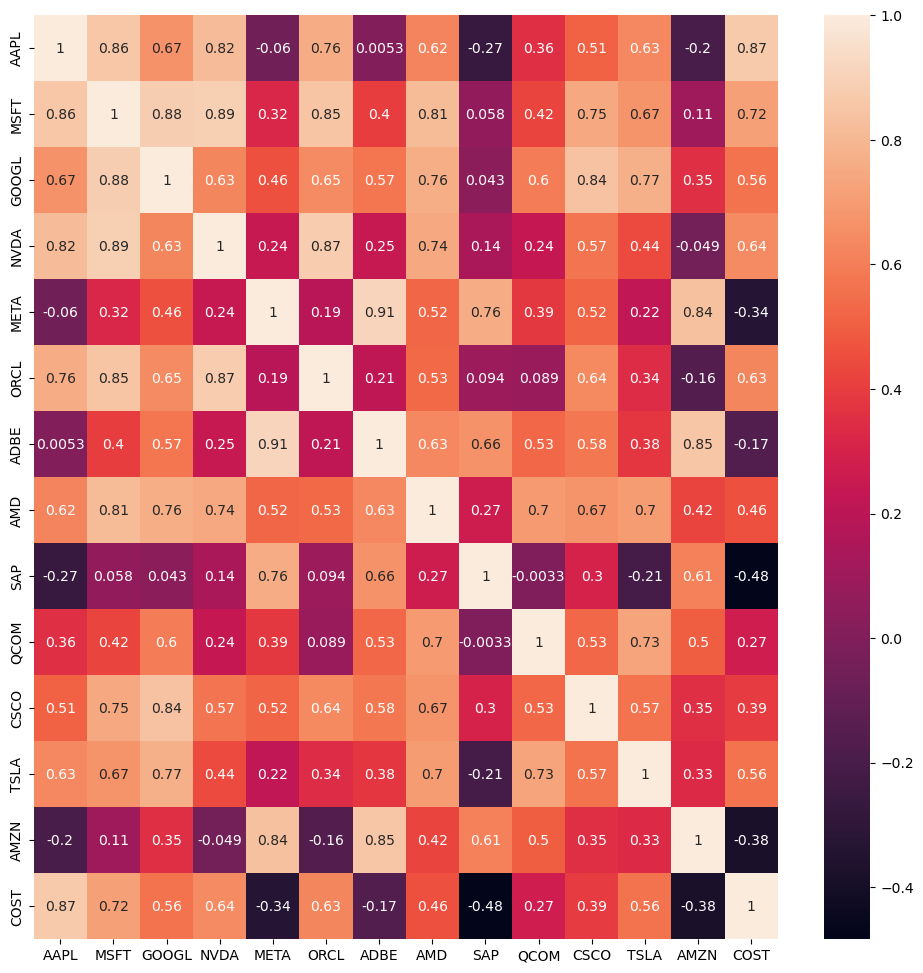

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

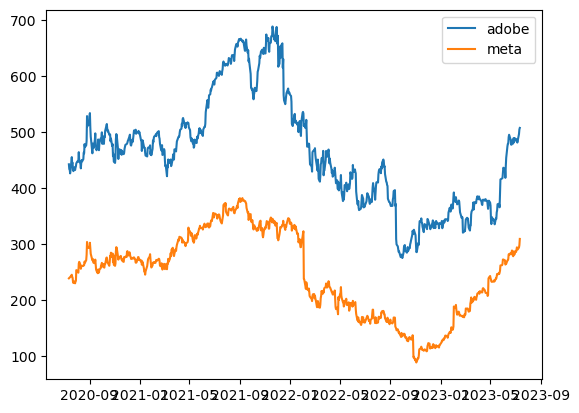

In [12]:
plt.plot(data['ADBE'],label='adobe')
plt.plot(data['META'],label='meta')
plt.legend()
plt.show()


Text(0.5, 1.0, 'spread adobe vs meta')

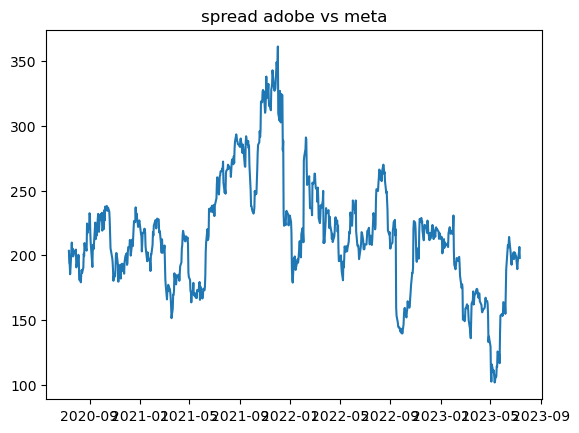

In [13]:
plt.plot(data['ADBE']-data['META']) 
plt.title('spread adobe vs meta')

Text(0.5, 1.0, 'price ratio adobe vs meta')

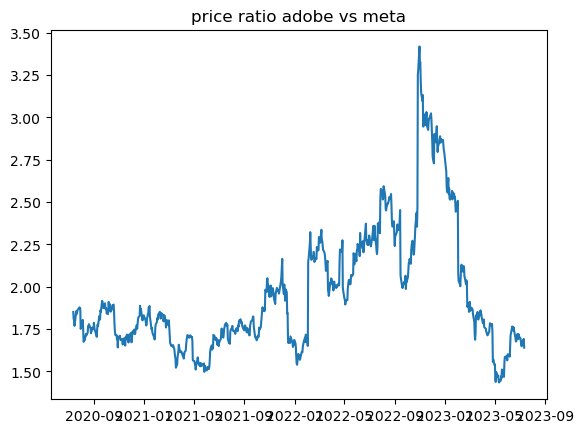

In [14]:
plt.plot(data['ADBE']/data['META'])
plt.title('price ratio adobe vs meta')

In [16]:
import statsmodels.tsa.stattools as st
results = st.coint(data['ADBE'],data['META'])

In [17]:
'''check for cointegration between all the pairs, we reqire the value to be lower than 0.1,
to assume the pairs are reasonably stationary'''

n = len(ticks)
results = np.ones((n,n))
for i in range(n):
    
    for j in range(n):
        
        if i != j:
            results[i,j] = st.coint(data.iloc[:,i],data.iloc[:,j])[1]

<AxesSubplot: >

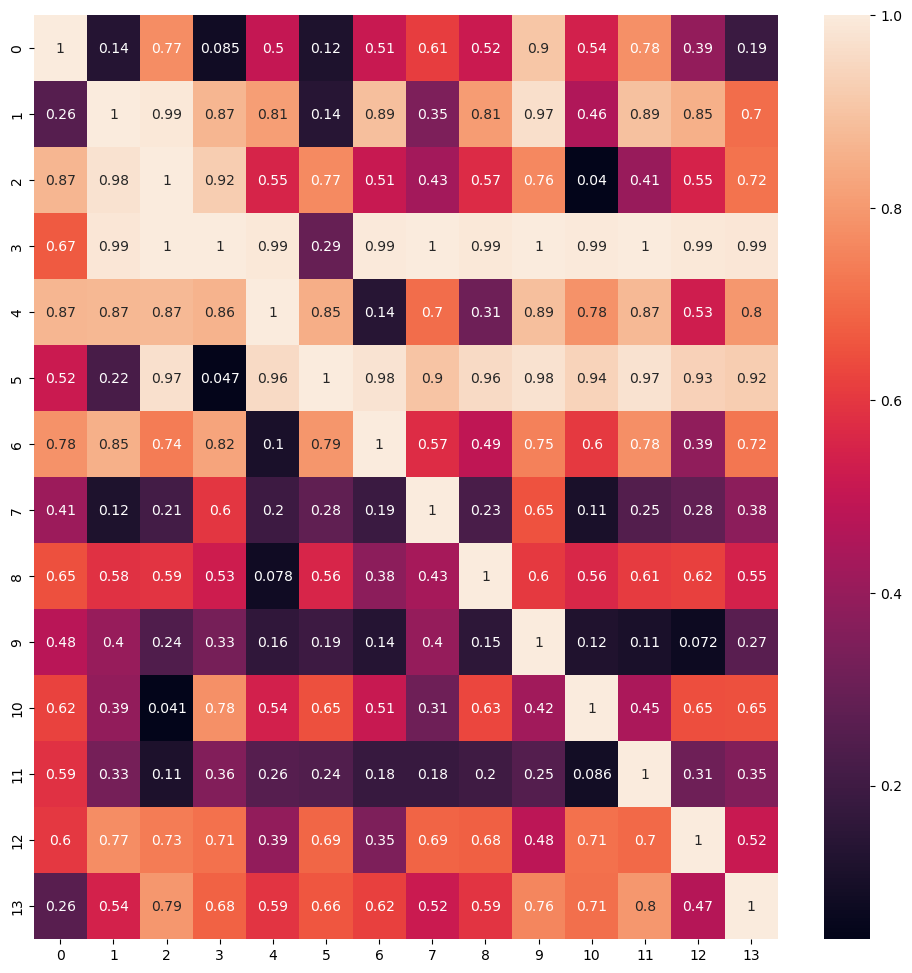

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(results,annot=True)

In [19]:
st.coint(data['ADBE'],data['META'])[1]        # cointegration between adobe and meta

0.10405374517450511

In [20]:
adobe = data['ADBE']
meta = data['META']

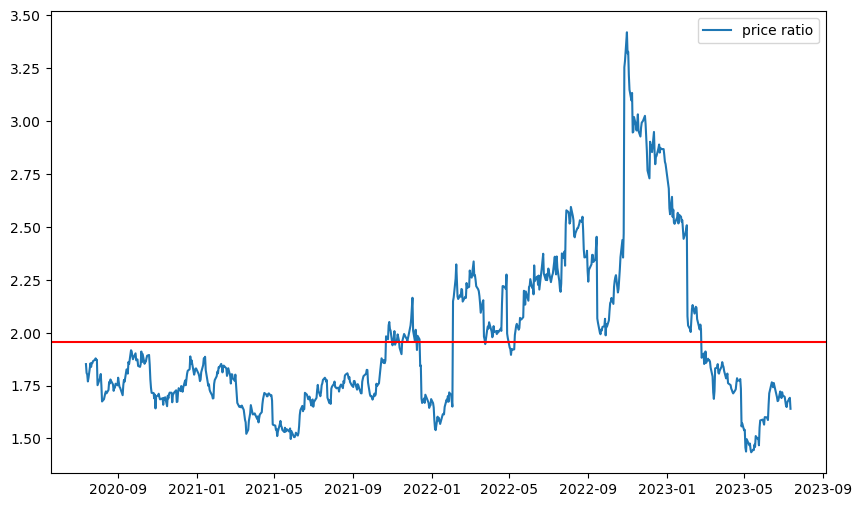

In [21]:
plt.figure(figsize=(10,6))
ratio = adobe/meta
plt.plot(ratio,label = 'price ratio')
plt.axhline(ratio.mean(),color='red')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

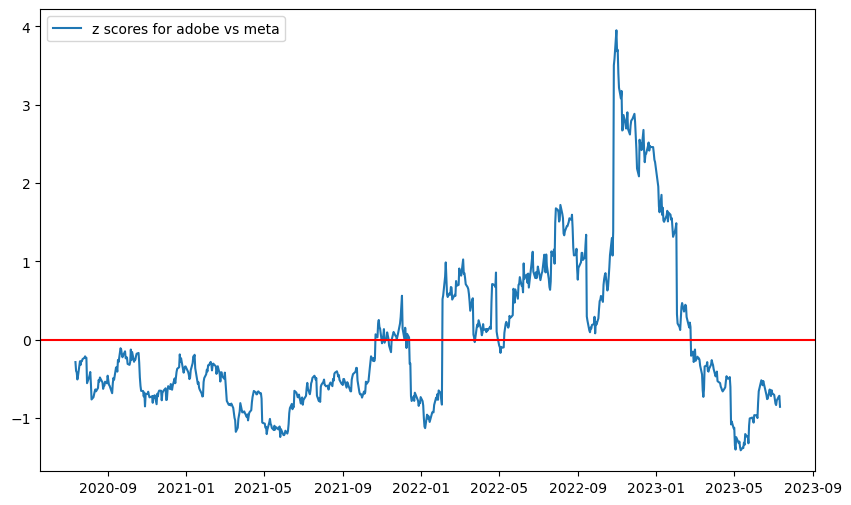

In [22]:
plt.figure(figsize=(10,6))
z_score = (ratio - ratio.mean())/ratio.std()
plt.plot(z_score,label='z scores for adobe vs meta')
plt.axhline(z_score.mean(),color='red')
plt.legend()
plt.show

In [23]:
rolling_mean = ratio.rolling(window = 20).mean()
rolling_std = ratio.rolling(window = 20).std()

In [24]:
rolling_zscore = (ratio-rolling_mean)/rolling_std

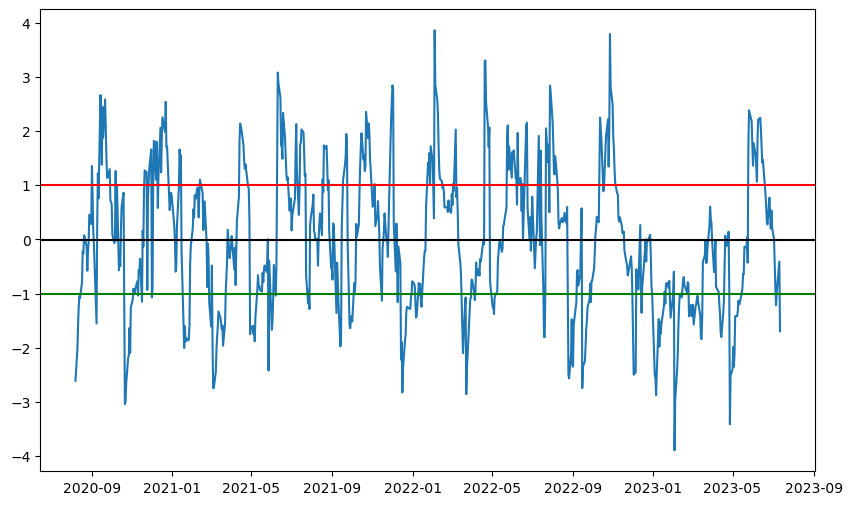

In [25]:
"""Z score based on the current price and 20 day moving average."""

plt.figure(figsize=(10,6))
plt.plot(rolling_zscore,label ='rolling Z score')
plt.axhline(rolling_zscore.mean(),color='black',label='mean')
plt.axhline(1,color='red')
#plt.axhline(1.5)
plt.axhline(-1,color='green')
#plt.axhline(-1.5)

In [259]:
ratio_mavg20 = ratio.rolling(window = 20).mean()
ratio_mavg5 = ratio.rolling(window =5 ).mean()
ratio_std20 = ratio.rolling(window =20).std()

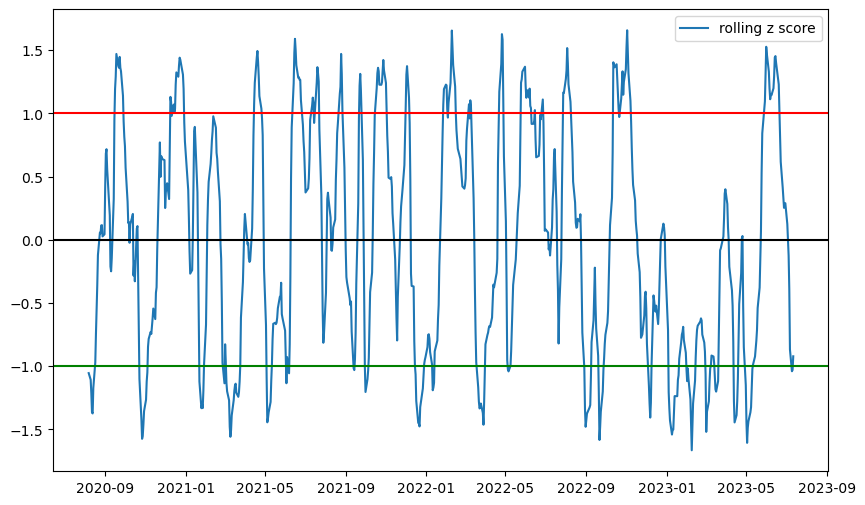

In [260]:
"""Z score based on 5 day moving average and 20 day moving average."""


zscore20_5 = (ratio_mavg5 - ratio_mavg20)/ratio_std20
plt.figure(figsize=(10,6))
plt.plot(zscore20_5,label='rolling z score')
plt.axhline(0,color='black')
plt.axhline(1,color='red')
plt.axhline(-1,color='green')
plt.legend()
plt.show()

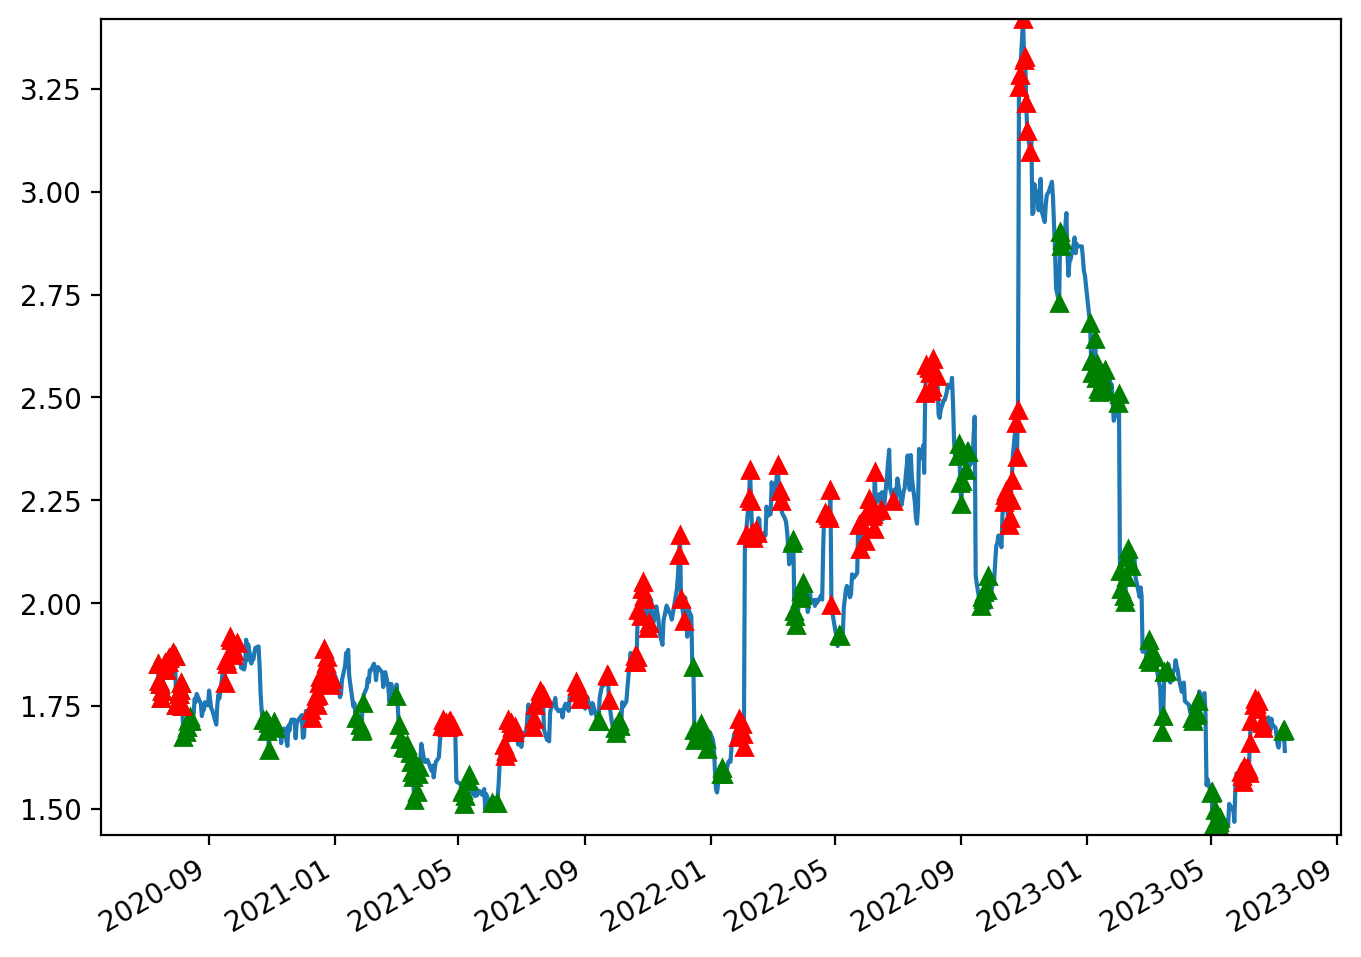

In [261]:
"""The model generates a buy signal when the Zscore falls beyond one standard deviation 
i.e., if the price ratio falls much lower in the last 5 days compared to last 20 days"""


plt.figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore20_5>-1] = 0
sell[zscore20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.show()